Настоящая работа это кейс продвижения розничной сети магазинов продуктов питания с собственной торговой маркой продукции, стремящейся повысить уровень клиентской лояльности посредством внедрения соответствующей программы. Розничная сеть принадлежит крупному агропромышленному холдингу, производящему продукты питания преимущественно мясного направления и ориентированного на массовый сегмент потребителей. Холдинг активно развивает собственную розничную сеть, включающую на сегодня около 200 магазинов формата «у дома», при этом предлагающих ограниченный ассортимент товаров с преобладанием собственных торговых марок. Целью исследования является поддержка команды проекта компании в разработке эффективной программы лояльности путем идентификации ключевых групп покупателей, формирующих наибольшую долю дохода, прогнозирования оттока клиентов, персонализации предложений по различным сегментам аудитории, оптимизации ассортимента и анализа временных закономерностей потребительских покупок.

Исходные данные представляют собой выборочную выгрузку из бухгалтерского программного комплекса 1С, содержащую сведения по приблизительно десяти магазинам, охватывающую более двух тысяч зарегистрированных пользователей карты лояльности, совершивших покупки в период 2024—2025 годов.

In [1]:
import pandas as pd

# ============================================
# БЛОК 1: Конвертация Excel в CSV
# ============================================
# Читаем исходный Excel-файл в DataFrame
df_temp = pd.read_excel('Данные для анализа.xlsx')

# Сохраняем данные в формат CSV без индексов строк
df_temp.to_csv('analysis.csv', index=False)

# ============================================
# БЛОК 2: Подготовка данных с переименованием колонок
# ============================================
# Определяем список новых имён колонок 
columns = [
    'client_id',           # ID клиента
    'purchase_datetime',   # Дата и время покупки
    'store_name',          # Название магазина
    'product_name',        # Название товара
    'quantity',            # Количество единиц товара
    'price',               # Цена товара
    'discount',            # Скидка на товар
    'is_weighted',         # Флаг: весовой товар (да/нет)
    'weight_kg',           # Вес товара в килограммах
    'price_per_kg',        # Цена за килограмм
    'is_food',             # Флаг: продукт питания (да/нет)
    'is_own_brand'         # Флаг: собственный бренд магазина (да/нет)
]

# Читаем CSV-файл с применением новых названий колонок
df = pd.read_csv('analysis.csv', sep=',', names=columns, skiprows=1)

# Выводим первые 5 строк для проверки корректности загрузки
display(df.head(5))

# Сохраняем переименованный датасет в новый CSV-файл
df.to_csv('renamed_dataset.csv')

,client_id,purchase_datetime,store_name,product_name,quantity,price,discount,is_weighted,weight_kg,price_per_kg,is_food,is_own_brand
0,4780333000903,02.01.2024 9:30:51,Ульяновская 10 (50),***Чипсы Биг Бон CHIPS картоф. вкус Краб 75г,1.0,46.01,19.09,True,0.075,613.466667,1,0
1,4780333000903,02.01.2024 9:30:51,Ульяновская 10 (50),"Батон нарезной в/с 0,350 упак.КЧХК",1.0,22.08,22.92,True,0.350,63.085714,1,0
2,4780333000903,02.01.2024 9:30:51,Ульяновская 10 (50),БЗМЖ Сыр Тильзитер 45% 200г Юговской КМП,1.0,101.15,52.85,True,0.200,505.750000,1,0
3,4780333000903,02.01.2024 9:30:51,Ульяновская 10 (50),Гренки Фишка 120г холодец с хреном Россия,1.0,55.13,10.17,True,0.120,459.416667,1,0
4,4780333000903,02.01.2024 9:30:51,Ульяновская 10 (50),Кетчуп Классический 350г м/у Здрава Россия/16,1.0,64.34,22.56,True,0.350,183.828571,1,0


Первоначально используемый набор метрик в датафрейме является простым и детально исследованным действующей командой аналитиков компании. Однако вследствие особенностей деятельности конкретной бизнес-модели указанный набор данных признан недостаточно информативным. Причиной этому служит узкий ассортимент продукции и доминирование товаров собственного производства на торговых площадях, что затрудняет объективную оценку покупательского поведения исключительно по данным кассового чека. Фактически признается, что у части потребителей существующая торговая политика вызывает удовлетворение, другая часть выражает недовольство, однако данная ситуация не подлежит объективному измерению. 

Используемые (стартовые) данные:
    client_id  - уникальный идентификатор клиента, совершившего покупку;
    purchase_datetime  - дата и время совершения покупки;
    store_name - название магазина, где была совершена покупка;
    product_name  - название приобретенного товара;
    quantity - количество купленного товара;
    price - цена за единицу товара (без учета скидки);
    discount - величина скидки на товар (может быть выражена в процентах или абсолютных значениях);
    is_weighted  - флаг, указывающий, является ли товар взвешиваемым (True, если да, False иначе);
    weight_kg  - вес товара в килограммах (актуально только для товаров, отмеченных как взвешиваемые);
    price_per_kg  - цена товара за килограмм (для взвешиваемых продуктов);
    is_food  - флаг, обозначающий, относится ли продукт к категории пищевых товаров (True, если еда, False иначе);
    is_own_brand  - признак принадлежности продукта собственной торговой марке сети магазинов (True, если собственный бренд, False иначе).

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')  # Отключаем предупреждения для чистоты вывода

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
import json
from pathlib import Path

# ============================================================================
# КЛАСС ДЛЯ ЗАГРУЗКИ И ПРЕДОБРАБОТКИ ДАННЫХ
# ============================================================================
class DataLoader:
    """
    Класс для загрузки исходных данных из файлов и их первичной обработки.
    Поддерживает форматы Excel (.xlsx) и CSV (?).
    """

    @staticmethod
    def load_data(filepath: str) -> pd.DataFrame:
        """
        Загружает данные из файла в DataFrame.
        
        Args:
            filepath: Путь к файлу данных
            
        Returns:
            DataFrame с загруженными данными
        """
        # Определяем формат файла по расширению и загружаем соответствующим методом
        if filepath.endswith('.xlsx'):
            df = pd.read_excel(filepath)
        else:
            df = pd.read_csv(filepath)
        return df

    @staticmethod
    def preprocess_data(df: pd.DataFrame) -> pd.DataFrame:
        """
        Выполняет предобработку данных: типизация, очистка, создание новых полей.
        
        Args:
            df: Исходный DataFrame
            
        Returns:
            Обработанный DataFrame с корректными типами и дополнительными полями
        """
        # Конвертация типов данных для корректной работы
        df['client_id'] = df['client_id'].astype(int)  # ID клиента как целое число
        df['purchase_datetime'] = pd.to_datetime(df['purchase_datetime'], format='%d.%m.%Y %H:%M:%S')  # Парсинг даты/времени
        df['price'] = pd.to_numeric(df['price'], errors='coerce')  # Цена как число (некорректные → NaN)
        df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')  # Количество как число
        df['discount'] = pd.to_numeric(df['discount'], errors='coerce')  # Скидка как число
        df['is_own_brand'] = df['is_own_brand'].astype(int)  # Флаг собственного бренда (0/1)

        # Удаление полных дубликатов строк
        df = df.drop_duplicates()
        
        # Заполнение пропущенных скидок нулями (отсутствие скидки)
        df['discount'] = df['discount'].fillna(0)
        
        # Расчёт итоговой цены после применения скидки
        df['final_price'] = df['price'] - df['discount']
        df['final_price'] = df['final_price'].clip(lower=0)  # Не допускаем отрицательных цен
        
        # Расчёт общей стоимости позиции (цена × количество)
        df['item_amount'] = df['final_price'] * df['quantity']

        # Вывод базовой статистики загруженных данных
        print(f"Загружено записей: {df.shape[0]}, уникальных клиентов: {df['client_id'].nunique()}")
        return df

В работе проводится классификация метрик чека, исследование их информативности методами машинного обучения и проверка предположения аналитиков о невысокой ценности данных. Для углубленного анализа создан класс MetricsCalculator, который рассчитывает индивидуальные показатели для каждого клиента. Исходные данные структурированы по следующим основным категориям метрик:

A. Частота покупок (RFM):
purchase_frequency — количество уникальных дней совершения покупок;
recency_days — количество дней с момента последней покупки;
transaction_count — общее число совершенных транзакций;
purchase_interval_mean, purchase_interval_std — среднее значение и стандартное отклонение интервалов между покупками.

B. Денежные показатели:
total_spending — общий объем расходов клиента;
avg_receipt_value — средняя сумма чека;
receipt_value_std — стандартное отклонение суммы чека;
spending_trend — динамика изменений расходов (коэффициент линейной регрессии).

C. Показатели лояльности к брендам холдинга:
own_brand_percentage — процент покупок продукции холдинга (% от общего числа позиций);
own_brand_spending_share — доля затрат на продукцию холдинга (% от общих расходов);
own_brand_loyalty_trend — изменения предпочтений клиентов относительно брендов холдинга (сравнение первой и второй половины периода наблюдения).

D. Показатели разнообразия ассортимента:
category_diversity — количество уникальных товарных категорий.
product_diversity_index — индекс энтропии Шеннона (разнообразие приобретаемых продуктов).
herfindahl_concentration — индекс Херфиндаля-Хиршмана (уровень концентрации покупок среди отдельных продуктовых групп).

E. Временные паттерны поведения покупателей:
shopping_morning, shopping_afternoon, shopping_evening_pct — распределение покупок по временным периодам дня (% утренних, дневных и вечерних покупок соответственно).
weekend_shopping_pct — доля покупок, совершённых в выходные дни.
days_of_week_diversity — степень равномерности распределения покупок по дням недели.

F. Поведенческие характеристики:
stores_visited — количество разных торговых точек, посещённых клиентом;
main_store_loyalty — доля покупок, сделанных в основной торговой точке (% от всех покупок);
discount_participation_rate — частота участия покупателя в акциях со скидками (% покупок со скидкой);
basket_size_cv — коэффициент вариации среднего размера покупательской корзины.


АНАЛИЗ ЛОЯЛЬНОСТИ КЛИЕНТОВ

[1/5] Загрузка данных...
Загружено записей: 247651, уникальных клиентов: 2391

[2/5] Вычисление метрик...
Инициализация для 2391 клиентов
Рассчитано 41 метрик

[3/5] Построение индекса лояльности...
Индекс лояльности: среднее=27.42, макс=95.29

[4/5] Сегментация клиентов...

Сегментация клиентов:
                       client_id  loyalty_index  purchase_frequency   
customer_segment                                                      
Активные сторонники          348          67.91               79.87  \
Новые клиенты                607          11.05                4.26   
Перспективные клиенты        631          34.95               19.52   
Регулярные клиенты           210          37.38               11.09   
Спящие/Утратившие            588           8.84                2.43   
Уходящие сторонники            7          16.87               30.00   

                       total_spending  recency_days  
customer_segment                                  

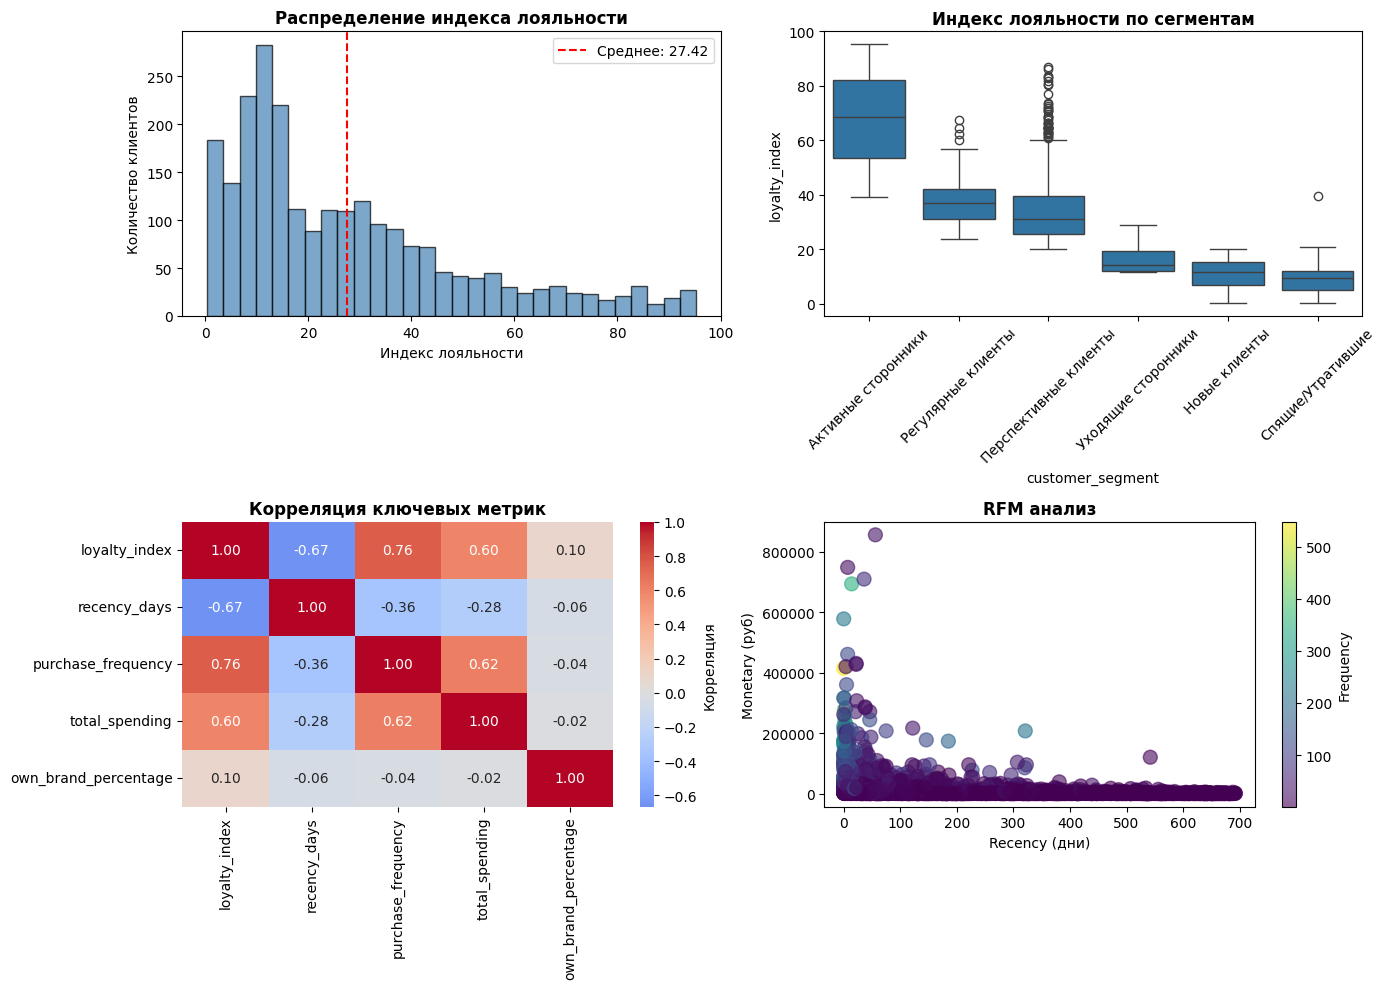

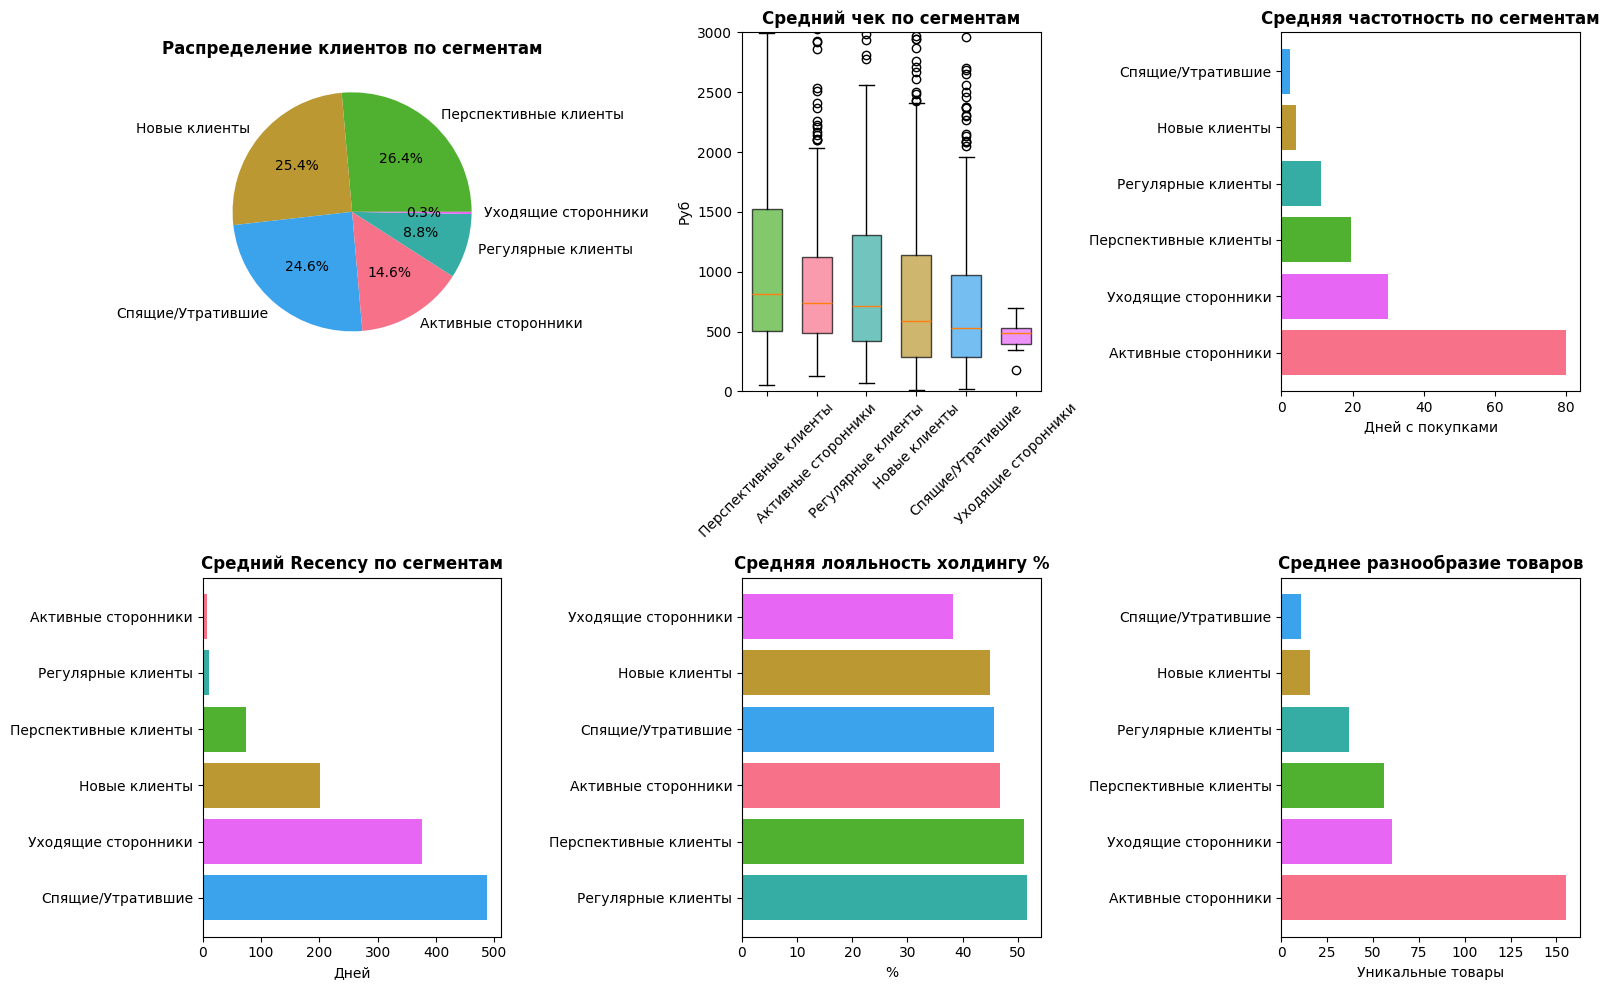

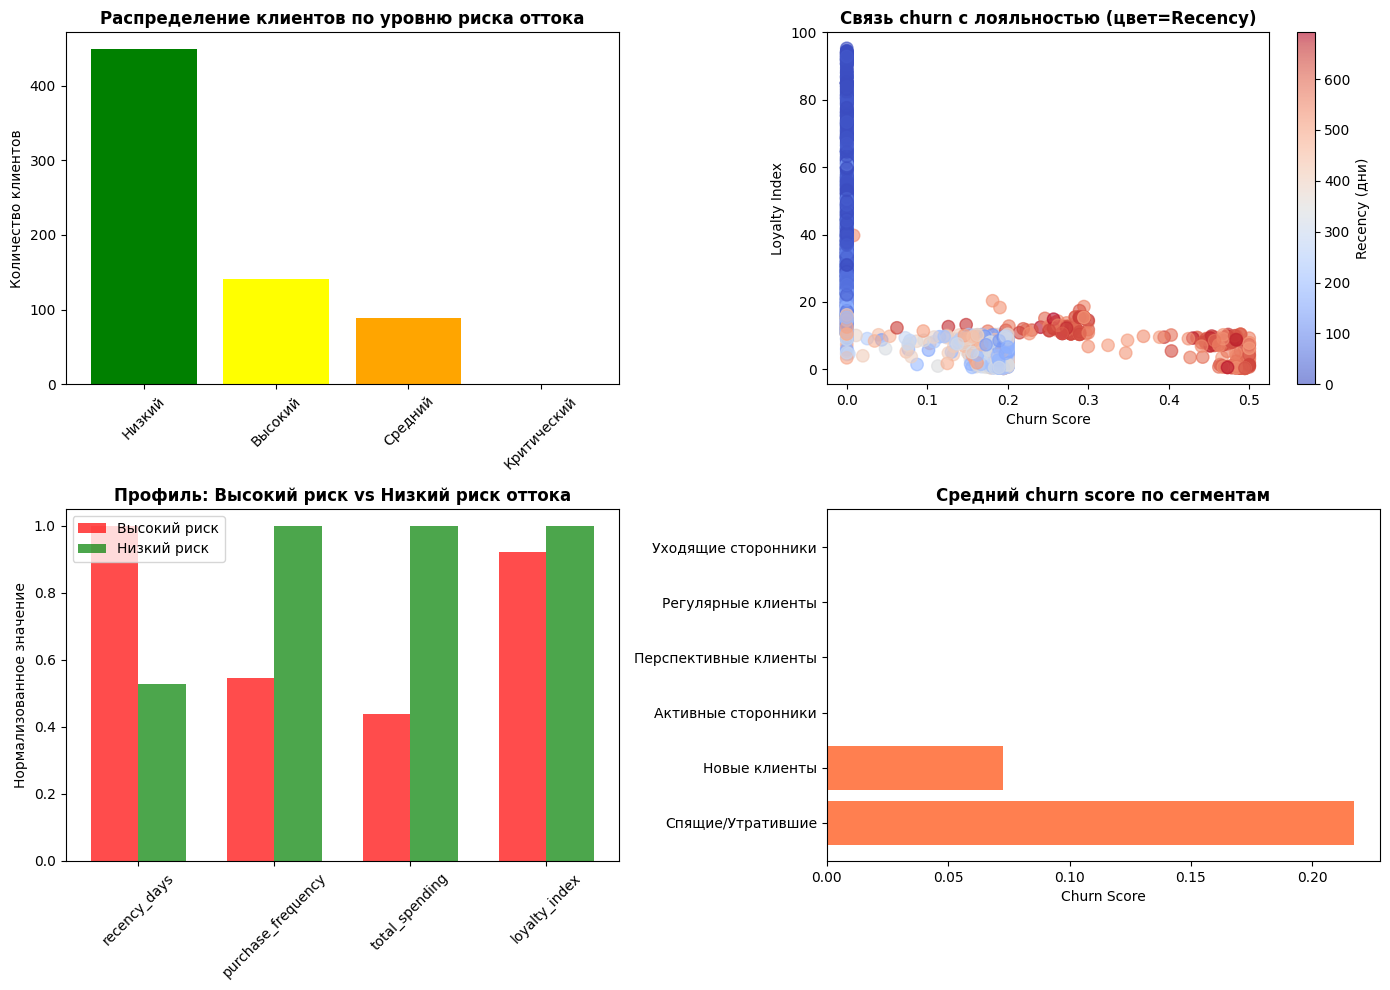

In [6]:
# ============================================================================
# КЛАСС ДЛЯ РАСЧЁТА МЕТРИК КЛИЕНТОВ
# ============================================================================
class MetricsCalculator:
    """
    Класс для вычисления комплексных метрик поведения клиентов.
    Анализирует частоту покупок, денежные показатели, лояльность к бренду и другие характеристики.
    """

    def __init__(self, df: pd.DataFrame, reference_date: datetime = None):
        """
        Инициализация калькулятора метрик.
        
        Args:
            df: DataFrame с транзакциями
            reference_date: Опорная дата для расчёта recency (по умолчанию - максимальная дата в данных)
        """
        self.df = df.sort_values('purchase_datetime')  # Сортировка по времени для корректного анализа
        self.reference_date = reference_date or self.df['purchase_datetime'].max()  # Точка отсчёта для recency
        self.customer_groups = df.groupby('client_id')  # Группировка по клиентам для агрегации
        self.n_customers = len(self.customer_groups)
        print(f"Инициализация для {self.n_customers} клиентов")

    def calculate_all_metrics(self) -> pd.DataFrame:
        """
        Рассчитывает все метрики для каждого клиента.
        
        Returns:
            DataFrame с метриками, индекс = client_id
        """
        metrics_dict = {}
        # Проходим по каждому клиенту и вычисляем его метрики
        for client_id in self.customer_groups.groups.keys():
            customer_data = self.df[self.df['client_id'] == client_id]
            metrics_dict[client_id] = self._calculate_customer_metrics(customer_data)

        # Преобразуем словарь метрик в DataFrame
        metrics_df = pd.DataFrame(metrics_dict).T
        metrics_df['client_id'] = metrics_df.index
        print(f"Рассчитано {len(metrics_df.columns)-1} метрик")
        return metrics_df

    def _calculate_customer_metrics(self, customer_data: pd.DataFrame) -> dict:
        """
        Вычисляет индивидуальные метрики для одного клиента.
        
        Args:
            customer_data: DataFrame с транзакциями конкретного клиента
            
        Returns:
            Словарь с метриками клиента
        """
        metrics = {}
        
        # === МЕТРИКИ ЧАСТОТЫ ПОКУПОК ===
        # Количество уникальных дней с покупками
        purchase_dates = customer_data['purchase_datetime'].dt.date.unique()
        metrics['purchase_frequency'] = len(purchase_dates)
        
        # Количество транзакций (чеков)
        transactions = customer_data.groupby('purchase_datetime').size()
        metrics['transaction_count'] = len(transactions)
        
        # Среднее количество товаров в одной транзакции
        items_per_transaction = customer_data.groupby('purchase_datetime').size()
        metrics['avg_items_per_transaction'] = items_per_transaction.mean()

        # Регулярность покупок: стандартное отклонение и средний интервал между покупками
        if len(purchase_dates) > 1:
            date_diffs = np.diff(np.sort(purchase_dates)).astype('timedelta64[D]').astype(int)
            metrics['purchase_interval_std'] = float(np.std(date_diffs))  # Изменчивость интервалов
            metrics['purchase_interval_mean'] = float(np.mean(date_diffs))  # Средний интервал
        else:
            # Если покупка одна - интервалы не определены
            metrics['purchase_interval_std'] = 0
            metrics['purchase_interval_mean'] = 0

        # === МЕТРИКИ RECENCY И АКТИВНОСТИ ===
        # Recency: сколько дней прошло с последней покупки
        last_purchase = customer_data['purchase_datetime'].max()
        metrics['recency_days'] = (self.reference_date - last_purchase).days
        
        # Период активности: от первой до последней покупки
        first_purchase = customer_data['purchase_datetime'].min()
        metrics['activity_period_days'] = (last_purchase - first_purchase).days

        # Покупки за последние 3 месяца (показатель текущей активности)
        three_months_ago = self.reference_date - timedelta(days=90)
        recent_purchases = customer_data[customer_data['purchase_datetime'] >= three_months_ago]
        metrics['purchases_last_3_months'] = len(recent_purchases['purchase_datetime'].dt.date.unique())

        # Тренд частоты: сравнение второй половины периода с первой
        first_half = customer_data[customer_data['purchase_datetime'] < first_purchase + timedelta(days=(last_purchase-first_purchase).days/2)]
        second_half = customer_data[customer_data['purchase_datetime'] >= first_purchase + timedelta(days=(last_purchase-first_purchase).days/2)]
        metrics['frequency_trend'] = len(second_half) - len(first_half)  # Положительное значение = рост активности

        # === МЕТРИКИ ДЕНЕЖНОЙ ЦЕННОСТИ (MONETARY) ===
        # Группируем по чекам для расчёта стоимости каждой транзакции
        receipts = customer_data.groupby('purchase_datetime')['item_amount'].sum()
        metrics['avg_receipt_value'] = receipts.mean()  # Средний чек
        metrics['total_spending'] = customer_data['item_amount'].sum()  # Общие траты
        metrics['receipt_value_std'] = receipts.std()  # Изменчивость чеков
        metrics['min_receipt_value'] = receipts.min()  # Минимальный чек
        metrics['max_receipt_value'] = receipts.max()  # Максимальный чек
        metrics['avg_product_price'] = customer_data['final_price'].mean()  # Средняя цена товара

        # Тренд трат: линейная регрессия для определения динамики расходов
        if len(receipts) > 1:
            x = np.arange(len(receipts))
            y = receipts.values
            z = np.polyfit(x, y, 1)  # Коэффициент наклона линии тренда
            metrics['spending_trend'] = z[0]  # Положительное = рост трат
        else:
            metrics['spending_trend'] = 0

        # Изменение уровня трат: отношение второй половины к первой
        first_half_spending = first_half['item_amount'].sum()
        second_half_spending = second_half['item_amount'].sum()
        metrics['spending_change_ratio'] = (second_half_spending / max(first_half_spending, 0.01)) - 1

        # Средний месячный бюджет
        months_active = max(1, metrics['activity_period_days'] / 30)
        metrics['avg_monthly_budget'] = metrics['total_spending'] / months_active

        # === МЕТРИКИ ЛОЯЛЬНОСТИ К СОБСТВЕННОМУ БРЕНДУ ===
        total_items = len(customer_data)
        own_brand_items = len(customer_data[customer_data['is_own_brand'] == 1])
        metrics['own_brand_percentage'] = (own_brand_items / total_items * 100) if total_items > 0 else 0

        # Траты на товары собственного бренда
        own_brand_spending = customer_data[customer_data['is_own_brand'] == 1]['item_amount'].sum()
        metrics['own_brand_spending'] = own_brand_spending
        metrics['own_brand_spending_share'] = (own_brand_spending / max(metrics['total_spending'], 0.01) * 100)

        # Уникальные товары собственного бренда
        own_brand_products = customer_data[customer_data['is_own_brand'] == 1]['product_name'].nunique()
        metrics['own_brand_unique_products'] = own_brand_products

        # Частота покупки товаров бренда (раз в месяц)
        own_brand_transactions = len(customer_data[customer_data['is_own_brand'] == 1]['purchase_datetime'].dt.date.unique())
        metrics['own_brand_purchases_per_month'] = (own_brand_transactions / months_active)

        # Тренд лояльности к бренду: сравнение периодов
        first_half_own = len(first_half[first_half['is_own_brand'] == 1])
        second_half_own = len(second_half[second_half['is_own_brand'] == 1])
        metrics['own_brand_loyalty_trend'] = (second_half_own - first_half_own)

        # === МЕТРИКИ РАЗНООБРАЗИЯ ПОКУПОК ===
        # Количество уникальных категорий/товаров
        if 'category' in customer_data.columns:
            metrics['category_diversity'] = customer_data['category'].nunique()
        else:
            metrics['category_diversity'] = customer_data['product_name'].nunique()

        # Индекс разнообразия Шеннона (энтропия выбора товаров)
        value_counts = customer_data['product_name'].value_counts()
        proportions = value_counts / value_counts.sum()
        metrics['product_diversity_index'] = -np.sum(proportions * np.log(proportions + 1e-10))
        
        # Индекс концентрации Херфиндаля (чем выше - тем меньше разнообразие)
        metrics['herfindahl_concentration'] = np.sum(proportions ** 2)

        # === МЕТРИКИ ВРЕМЕННЫХ ПАТТЕРНОВ ===
        # Предпочтения по времени суток
        morning = len(customer_data[(customer_data['purchase_datetime'].dt.hour >= 6) & (customer_data['purchase_datetime'].dt.hour < 12)])
        afternoon = len(customer_data[(customer_data['purchase_datetime'].dt.hour >= 12) & (customer_data['purchase_datetime'].dt.hour < 18)])
        evening = len(customer_data[(customer_data['purchase_datetime'].dt.hour >= 18) & (customer_data['purchase_datetime'].dt.hour < 23)])
        metrics['shopping_morning_pct'] = (morning / total_items * 100) if total_items > 0 else 0
        metrics['shopping_afternoon_pct'] = (afternoon / total_items * 100) if total_items > 0 else 0
        metrics['shopping_evening_pct'] = (evening / total_items * 100) if total_items > 0 else 0

        # Доля покупок в выходные дни
        weekends = len(customer_data[customer_data['purchase_datetime'].dt.dayofweek >= 5])
        metrics['weekend_shopping_pct'] = (weekends / total_items * 100) if total_items > 0 else 0

        # Разнообразие дней недели для покупок
        days_of_week = customer_data['purchase_datetime'].dt.dayofweek.unique()
        metrics['days_of_week_diversity'] = len(days_of_week) / 7

        # Регулярность покупок (обратно пропорциональна разбросу интервалов)
        if metrics['activity_period_days'] > 7:
            metrics['purchasing_regularity'] = 1 / (metrics['purchase_interval_std'] + 1)
        else:
            metrics['purchasing_regularity'] = 0

        # === МЕТРИКИ ПО МАГАЗИНАМ ===
        # Количество посещённых магазинов
        metrics['stores_visited'] = customer_data['store_name'].nunique()
        
        # Лояльность к основному магазину
        main_store = customer_data['store_name'].value_counts().index[0]
        main_store_purchases = len(customer_data[customer_data['store_name'] == main_store])
        metrics['main_store_loyalty'] = (main_store_purchases / total_items * 100) if total_items > 0 else 0

        # === МЕТРИКИ ПО СКИДКАМ ===
        # Частота использования скидок
        discounted_items = len(customer_data[customer_data['discount'] > 0])
        metrics['discount_participation_rate'] = (discounted_items / total_items * 100) if total_items > 0 else 0
        metrics['avg_discount_amount'] = customer_data['discount'].mean()  # Средняя скидка в рублях
        metrics['avg_discount_percentage'] = (customer_data['discount'] / customer_data['price'] * 100).mean()  # Средний % скидки

        # === МЕТРИКИ КОРЗИНЫ ===
        # Средний размер и стоимость корзины
        metrics['avg_basket_size'] = customer_data.groupby('purchase_datetime').size().mean()
        metrics['avg_basket_value'] = receipts.mean()
        
        # Коэффициент вариации размера корзины (стабильность покупательского поведения)
        basket_sizes = customer_data.groupby('purchase_datetime').size()
        metrics['basket_size_cv'] = (basket_sizes.std() / basket_sizes.mean()) if basket_sizes.mean() > 0 else 0

        return metrics


# ============================================================================
# КЛАСС ДЛЯ ГЕНЕРАЦИИ ТЕКСТОВЫХ ОТЧЁТОВ
# ============================================================================
class ReportGenerator:
    """
    Класс для формирования сводных текстовых отчётов по результатам анализа.
    """

    @staticmethod
    def generate_executive_summary(metrics_df: pd.DataFrame, output_path: str = None) -> str:
        """
        Создаёт executive summary с ключевыми показателями и инсайтами.
        
        Args:
            metrics_df: DataFrame с метриками и сегментами клиентов
            output_path: Путь для сохранения отчёта (опционально)
            
        Returns:
            Текст отчёта
        """
        report = []
        report.append("="*80)
        report.append("ОТЧЕТ ПО АНАЛИЗУ ЛОЯЛЬНОСТИ КЛИЕНТОВ")
        report.append("="*80)
        report.append("")

        # === ОБЩАЯ СТАТИСТИКА ===
        report.append("ОБЩАЯ СТАТИСТИКА")
        report.append("-" * 80)
        report.append(f"Всего клиентов:                      {len(metrics_df):>10}")
        report.append(f"Средний индекс лояльности:           {metrics_df['loyalty_index'].mean():>10.2f} из 100")
        report.append(f"Медиана индекса лояльности:          {metrics_df['loyalty_index'].median():>10.2f}")
        report.append(f"Средняя частотность покупок:         {metrics_df['purchase_frequency'].mean():>10.1f} дней")
        report.append(f"Средний чек:                         {metrics_df['avg_receipt_value'].mean():>10.2f} руб")
        report.append(f"Средний Recency:                     {metrics_df['recency_days'].mean():>10.1f} дней")
        report.append("")

        # === СЕГМЕНТАЦИЯ ===
        report.append("СЕГМЕНТАЦИЯ КЛИЕНТОВ")
        report.append("-" * 80)
        # Агрегируем статистику по сегментам
        segment_summary = metrics_df.groupby('customer_segment').agg({
            'client_id': 'count',
            'loyalty_index': 'mean',
            'total_spending': 'mean',
            'purchase_frequency': 'mean'
        }).round(2)

        # Формируем описание каждого сегмента
        for segment in segment_summary.index:
            count = int(segment_summary.loc[segment, 'client_id'])
            pct = count / len(metrics_df) * 100
            loyalty = segment_summary.loc[segment, 'loyalty_index']
            spending = segment_summary.loc[segment, 'total_spending']

            report.append(f"\n  {segment}")
            report.append(f"    Клиентов: {count} ({pct:.1f}%)")
            report.append(f"    Средняя лояльность: {loyalty:.2f}")
            report.append(f"    Среднее потребление: {spending:.2f} руб")

        report.append("")

        # === РИСК ОТТОКА ===
        report.append("РИСК ОТТОКА")
        report.append("-" * 80)

        # Фильтруем клиентов с высоким/критическим риском
        high_risk = metrics_df[metrics_df['churn_risk_level'].isin(['Высокий', 'Критический'])]
        report.append(f"Клиентов с высоким риском:           {len(high_risk)} ({len(high_risk)/len(metrics_df)*100:.1f}%)")

        # Профиль группы риска
        if len(high_risk) > 0:
            report.append(f"\nХарактеристики группы риска:")
            report.append(f"  Средний Recency:          {high_risk['recency_days'].mean():.1f} дней")
            report.append(f"  Средняя частотность:      {high_risk['purchase_frequency'].mean():.1f} дней")
            report.append(f"  Среднее потребление:      {high_risk['total_spending'].mean():.2f} руб")
            report.append(f"  Средняя лояльность:       {high_risk['loyalty_index'].mean():.2f}")

        report.append("")
        report.append("\n" + "="*80)

        # Объединяем строки отчёта
        report_text = "\n".join(report)

        # Сохраняем в файл, если указан путь
        if output_path:
            with open(output_path, 'w', encoding='utf-8') as f:
                f.write(report_text)
            print(f"Отчет сохранен: {output_path}")

        print(report_text)
        return report_text


# ============================================================================
# КЛАСС ДЛЯ УПРАВЛЕНИЯ ПАЙПЛАЙНОМ АНАЛИЗА
# ============================================================================
class AnalysisPipeline:
    """
    Оркестратор всего процесса анализа: от загрузки данных до экспорта результатов.
    """

    @staticmethod
    def run_full_analysis(filepath: str, output_dir: str = './analysis_results'):
        """
        Выполняет полный цикл анализа лояльности клиентов.
        
        Args:
            filepath: Путь к файлу с исходными данными
            output_dir: Папка для сохранения результатов
            
        Returns:
            Кортеж (metrics_df, enriched_df) с метриками и обогащёнными транзакциями
        """
        # Создаём папку для результатов
        Path(output_dir).mkdir(exist_ok=True)

        print("\n" + "="*70)
        print("АНАЛИЗ ЛОЯЛЬНОСТИ КЛИЕНТОВ")
        print("="*70)

        # [Этап 1] Загрузка и предобработка
        print("\n[1/5] Загрузка данных...")
        loader = DataLoader()
        df = loader.load_data(filepath)
        df = loader.preprocess_data(df)

        # [Этап 2] Расчёт метрик для каждого клиента
        print("\n[2/5] Вычисление метрик...")
        calculator = MetricsCalculator(df)
        metrics_df = calculator.calculate_all_metrics()

        # [Этап 3] Построение индекса лояльности
        print("\n[3/5] Построение индекса лояльности...")
        builder = LoyaltyIndexBuilder()
        metrics_df = builder.build_loyalty_index(metrics_df)

        # [Этап 4] Сегментация клиентов на основе поведения
        print("\n[4/5] Сегментация клиентов...")
        metrics_df = builder.segment_customers(metrics_df)

        # [Этап 5] Оценка риска оттока
        print("\n[5/5] Анализ риска оттока...")
        churn_analyzer = ChurnAnalysis()
        metrics_df = churn_analyzer.identify_churning_customers(metrics_df)

        # === ЭКСПОРТ РЕЗУЛЬТАТОВ ===
        print("\n" + "="*70)
        print("ЭКСПОРТ РЕЗУЛЬТАТОВ")
        print("="*70)

        # Полный набор метрик
        metrics_path = f'{output_dir}/customer_metrics_full.csv'
        metrics_df.to_csv(metrics_path, index=False)
        print(f"Полные метрики: {metrics_path}")

        # Ключевые метрики для быстрого обзора
        key_metrics = metrics_df[[
            'client_id', 'loyalty_index', 'customer_segment', 'churn_score', 'churn_risk_level',
            'purchase_frequency', 'recency_days', 'total_spending', 'avg_receipt_value',
            'own_brand_percentage', 'category_diversity', 'stores_visited'
        ]]
        key_metrics_path = f'{output_dir}/customer_key_metrics.csv'
        key_metrics.to_csv(key_metrics_path, index=False)
        print(f"Ключевые метрики: {key_metrics_path}")

        # Транзакции с добавленными метриками клиентов
        enriched_df = df.merge(metrics_df[['client_id', 'loyalty_index', 'customer_segment']],
                               on='client_id', how='left')
        enriched_path = f'{output_dir}/transactions_enriched.csv'
        enriched_df.to_csv(enriched_path, index=False)
        print(f"Обогащённые транзакции: {enriched_path}")

        # JSON-отчёт с агрегированной статистикой
        report = {
            'summary': {
                'total_customers': len(metrics_df),
                'total_transactions': len(df),
                'avg_loyalty_index': float(metrics_df['loyalty_index'].mean()),
                'median_loyalty_index': float(metrics_df['loyalty_index'].median()),
                'analysis_period': f"{df['purchase_datetime'].min()} to {df['purchase_datetime'].max()}"
            },
            'segments': metrics_df['customer_segment'].value_counts().to_dict(),
            'churn_risk_distribution': metrics_df['churn_risk_level'].value_counts().to_dict(),
            'metrics_description': {
                'purchase_frequency': 'Количество дней с покупками',
                'recency_days': 'Дней с последней покупки',
                'total_spending': 'Совокупные затраты (руб)',
                'loyalty_index': 'Комплексный индекс 0-100',
                'churn_score': 'Риск оттока 0-1',
                'own_brand_percentage': 'Доля товаров холдинга %'
            }
        }

        report_path = f'{output_dir}/analysis_report.json'
        with open(report_path, 'w', encoding='utf-8') as f:
            json.dump(report, f, ensure_ascii=False, indent=2)
        print(f"Отчет: {report_path}")

        print("\n" + "="*70)
        print(f"АНАЛИЗ ЗАВЕРШЕН. Результаты в папке: {output_dir}/")
        print("="*70)

        return metrics_df, enriched_df


# ============================================================================
# КЛАСС ДЛЯ ПОСТРОЕНИЯ ИНДЕКСА ЛОЯЛЬНОСТИ
# ============================================================================
class LoyaltyIndexBuilder:
    """
    Класс для построения комплексного индекса лояльности и сегментации клиентов.
    Индекс формируется из нескольких компонентов (RFM + лояльность бренду + разнообразие).
    """

    @staticmethod
    def build_loyalty_index(metrics_df: pd.DataFrame) -> pd.DataFrame:
        """
        Строит индекс лояльности на основе 5 компонентов.
        
        Args:
            metrics_df: DataFrame с метриками клиентов
            
        Returns:
            DataFrame с добавленными компонентами и итоговым индексом (0-100)
        """
        df = metrics_df.copy()
        scaler = StandardScaler()

        # === КОМПОНЕНТ 1: RECENCY (макс 25 баллов) ===
        # Чем меньше дней с последней покупки - тем выше балл
        # Нормируем на 180 дней (полгода)
        df['recency_score'] = 25 * np.maximum(0, 1 - df['recency_days'] / 180)

        # === КОМПОНЕНТ 2: FREQUENCY (макс 25 баллов) ===
        # Нормируем частоту на 95-й перцентиль (обрезаем выбросы)
        freq_max = df['purchase_frequency'].quantile(0.95)
        df['frequency_score'] = 25 * np.minimum(1, df['purchase_frequency'] / freq_max)

        # === КОМПОНЕНТ 3: MONETARY (макс 25 баллов) ===
        # Нормируем траты на 95-й перцентиль
        monetary_max = df['total_spending'].quantile(0.95)
        df['monetary_score'] = 25 * np.minimum(1, df['total_spending'] / monetary_max)

        # === КОМПОНЕНТ 4: ЛОЯЛЬНОСТЬ БРЕНДУ (макс 15 баллов) ===
        # 10 баллов за процент товаров бренда
        brand_pct_score = df['own_brand_percentage'] / 100 * 10
        # +5/-5 баллов за тренд лояльности к бренду
        brand_trend_score = np.sign(df['own_brand_loyalty_trend']) * 5
        df['brand_loyalty_score'] = np.clip(brand_pct_score + brand_trend_score, 0, 15)

        # === КОМПОНЕНТ 5: РАЗНООБРАЗИЕ ПОКУПОК (макс 10 баллов) ===
        # Награждаем клиентов, покупающих разнообразные товары
        diversity_max = df['category_diversity'].quantile(0.95)
        df['diversity_score'] = 10 * np.minimum(1, df['category_diversity'] / diversity_max)

        # === СУММАРНЫЙ ИНДЕКС (макс 100 баллов) ===
        df['loyalty_index'] = (
            df['recency_score'] +
            df['frequency_score'] +
            df['monetary_score'] +
            df['brand_loyalty_score'] +
            df['diversity_score']
        )

        # Обрезаем значения в диапазон [0, 100]
        df['loyalty_index'] = np.clip(df['loyalty_index'], 0, 100)
        
        print(f"Индекс лояльности: среднее={df['loyalty_index'].mean():.2f}, макс={df['loyalty_index'].max():.2f}")
        return df

    @staticmethod
    def segment_customers(metrics_df: pd.DataFrame) -> pd.DataFrame:
        """
        Сегментирует клиентов на основе RFM-метрик и индекса лояльности.
        
        Args:
            metrics_df: DataFrame с метриками
            
        Returns:
            DataFrame с добавленной колонкой 'customer_segment'
        """
        df = metrics_df.copy()

        # Вычисляем перцентили для пороговых значений
        recency_25 = df['recency_days'].quantile(0.25)  # Недавние покупатели
        recency_75 = df['recency_days'].quantile(0.75)  # Давние покупатели
        freq_75 = df['purchase_frequency'].quantile(0.75)  # Частые покупатели
        freq_25 = df['purchase_frequency'].quantile(0.25)  # Редкие покупатели
        loyalty_75 = df['loyalty_index'].quantile(0.75)  # Высокая лояльность
        loyalty_50 = df['loyalty_index'].quantile(0.50)  # Средняя лояльность

        def assign_segment(row):
            """Правила назначения сегмента на основе метрик."""
            # Лучшие клиенты: недавно, часто, высокая лояльность
            if row['recency_days'] < recency_25 and row['purchase_frequency'] > freq_75 and row['loyalty_index'] > loyalty_75:
                return 'Активные сторонники'
            # Стабильные покупатели: недавно и относительно часто
            elif row['recency_days'] < recency_25 and row['purchase_frequency'] > freq_25:
                return 'Регулярные клиенты'
            # Клиенты с потенциалом: умеренные показатели
            elif row['recency_days'] < recency_75 and row['loyalty_index'] > loyalty_50:
                return 'Перспективные клиенты'
            # Риск оттока: давно не покупали, но раньше были активны
            elif row['recency_days'] > recency_75 and row['purchase_frequency'] > freq_75:
                return 'Уходящие сторонники'
            # Неактивные: давно нет покупок
            elif row['recency_days'] > recency_75:
                return 'Спящие/Утратившие'
            # Остальные: вероятно, новые клиенты
            else:
                return 'Новые клиенты'

        # Применяем правила сегментации к каждому клиенту
        df['customer_segment'] = df.apply(assign_segment, axis=1)

        # Выводим статистику по сегментам
        segment_stats = df.groupby('customer_segment').agg({
            'client_id': 'count',
            'loyalty_index': 'mean',
            'purchase_frequency': 'mean',
            'total_spending': 'mean',
            'recency_days': 'mean'
        }).round(2)

        print("\nСегментация клиентов:")
        print(segment_stats)
        return df


# ============================================================================
# КЛАСС ДЛЯ АНАЛИЗА РИСКА ОТТОКА
# ============================================================================
class ChurnAnalysis:
    """
    Класс для идентификации клиентов с риском оттока.
    Использует комбинацию recency, трендов и индекса лояльности.
    """

    @staticmethod
    def identify_churning_customers(metrics_df: pd.DataFrame, churn_threshold: float = 0.5) -> pd.DataFrame:
        """
        Рассчитывает churn score для каждого клиента и классифицирует уровень риска.
        
        Args:
            metrics_df: DataFrame с метриками
            churn_threshold: Порог для идентификации риска оттока (по умолчанию 0.5)
            
        Returns:
            DataFrame с добавленными колонками 'churn_score' и 'churn_risk_level'
        """
        df = metrics_df.copy()
        df['churn_score'] = 0.0  # Инициализация нулевого риска

        # === ФАКТОР 1: ВЫСОКИЙ RECENCY (макс +0.3 к score) ===
        # Если клиент не покупал очень давно - повышаем риск
        recency_90_pct = df['recency_days'].quantile(0.90)
        df.loc[df['recency_days'] > recency_90_pct, 'churn_score'] += 0.3

        # === ФАКТОР 2: НЕГАТИВНЫЙ ТРЕНД ЧАСТОТЫ (макс +0.3) ===
        # Если частота покупок снижается - риск растёт
        freq_std = df['frequency_trend'].std()
        if freq_std > 0:
            df['churn_score'] += np.clip(
                df['frequency_trend'] / abs(freq_std) * -0.3,  # Отрицательный тренд → положительный score
                -0.3, 0
            )

        # === ФАКТОР 3: НЕГАТИВНЫЙ ТРЕНД ТРАТ (макс +0.2) ===
        # Если траты падают - риск растёт
        spend_std = df['spending_trend'].std()
        if spend_std > 0:
            df['churn_score'] += np.clip(
                df['spending_trend'] / abs(spend_std) * -0.2,
                -0.2, 0
            )

        # === ФАКТОР 4: НИЗКАЯ ЛОЯЛЬНОСТЬ (макс +0.2) ===
        # Клиенты с низким индексом лояльности в зоне риска
        loyalty_25_pct = df['loyalty_index'].quantile(0.25)
        df.loc[df['loyalty_index'] < loyalty_25_pct, 'churn_score'] += 0.2

        # Нормируем churn_score в диапазон [0, 1]
        df['churn_score'] = np.clip(df['churn_score'], 0, 1)
        
        # Классифицируем уровень риска
        df['churn_risk_level'] = pd.cut(df['churn_score'], 
                                        bins=[0, 0.2, 0.4, 0.6, 1.0],
                                        labels=['Низкий', 'Средний', 'Высокий', 'Критический'])

        # Выводим статистику
        churning = df[df['churn_score'] >= churn_threshold].copy()
        print(f"\nКлиентов с риском оттока: {len(churning)} ({len(churning)/len(df)*100:.2f}%)")
        print(f"\nРаспределение по уровню риска:")
        print(df['churn_risk_level'].value_counts())
        return df


# ============================================================================
# КЛАСС ДЛЯ ВИЗУАЛИЗАЦИИ РЕЗУЛЬТАТОВ
# ============================================================================
class VisualizationEngine:
    """
    Класс для создания визуализаций результатов анализа.
    Генерирует графики распределений, корреляций и сегментов.
    """

    @staticmethod
    def create_loyalty_distribution(metrics_df: pd.DataFrame, output_path: str = None):
        """
        Создаёт набор графиков для анализа распределения лояльности.
        
        Включает:
        - Гистограмму индекса лояльности
        - Boxplot по сегментам
        - Корреляционную матрицу
        - RFM scatter plot
        """
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))

        # [График 1] Гистограмма распределения индекса лояльности
        axes[0, 0].hist(metrics_df['loyalty_index'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
        axes[0, 0].axvline(metrics_df['loyalty_index'].mean(), color='red', linestyle='--',
                          label=f'Среднее: {metrics_df["loyalty_index"].mean():.2f}')
        axes[0, 0].set_title('Распределение индекса лояльности', fontsize=12, fontweight='bold')
        axes[0, 0].set_xlabel('Индекс лояльности')
        axes[0, 0].set_ylabel('Количество клиентов')
        axes[0, 0].legend()

        # [График 2] Boxplot лояльности по сегментам (сортировка по убыванию среднего)
        segment_order = metrics_df.groupby('customer_segment')['loyalty_index'].mean().sort_values(ascending=False).index
        sns.boxplot(data=metrics_df, x='customer_segment', y='loyalty_index', ax=axes[0, 1], order=segment_order)
        axes[0, 1].set_title('Индекс лояльности по сегментам', fontsize=12, fontweight='bold')
        axes[0, 1].tick_params(axis='x', rotation=45)

        # [График 3] Корреляционная матрица ключевых метрик
        key_metrics = ['loyalty_index', 'recency_days', 'purchase_frequency', 'total_spending', 'own_brand_percentage']
        corr_matrix = metrics_df[key_metrics].corr()
        sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=axes[1, 0],
                   cbar_kws={'label': 'Корреляция'})
        axes[1, 0].set_title('Корреляция ключевых метрик', fontsize=12, fontweight='bold')

        # [График 4] RFM scatter plot (цвет = частота)
        scatter = axes[1, 1].scatter(metrics_df['recency_days'], metrics_df['total_spending'],
                                     c=metrics_df['purchase_frequency'], cmap='viridis', s=100, alpha=0.6)
        axes[1, 1].set_xlabel('Recency (дни)')
        axes[1, 1].set_ylabel('Monetary (руб)')
        axes[1, 1].set_title('RFM анализ', fontsize=12, fontweight='bold')
        plt.colorbar(scatter, ax=axes[1, 1], label='Frequency')

        plt.tight_layout()
        if output_path:
            plt.savefig(output_path, dpi=300, bbox_inches='tight')
            print(f"График сохранен: {output_path}")
        return fig

    @staticmethod
    def create_segment_analysis(metrics_df: pd.DataFrame, output_path: str = None):
        """
        Создаёт детальный анализ сегментов клиентов.
        
        Включает 6 графиков:
        - Распределение клиентов по сегментам (pie chart)
        - Boxplot среднего чека по сегментам
        - Частота покупок
        - Recency
        - Лояльность бренду
        - Разнообразие товаров
        """
        fig, axes = plt.subplots(2, 3, figsize=(16, 10))

        # Единая цветовая палитра для всех сегментов
        segments = sorted(metrics_df['customer_segment'].unique())
        segment_colors = dict(zip(segments, sns.color_palette('husl', len(segments))))

        # [График 1] Pie chart распределения клиентов
        segment_sizes = metrics_df['customer_segment'].value_counts()
        colors_pie = [segment_colors[seg] for seg in segment_sizes.index]
        axes[0, 0].pie(segment_sizes, labels=segment_sizes.index, autopct='%1.1f%%', colors=colors_pie)
        axes[0, 0].set_title('Распределение клиентов по сегментам', fontsize=12, fontweight='bold')

        # [График 2] Boxplot среднего чека по сегментам
        segment_order = metrics_df.groupby('customer_segment')['avg_receipt_value'].median().sort_values(ascending=False).index
        box_colors = [segment_colors[seg] for seg in segment_order]
        bp = axes[0, 1].boxplot([metrics_df[metrics_df['customer_segment'] == seg]['avg_receipt_value'].values 
                                   for seg in segment_order],
                                 labels=segment_order,
                                 patch_artist=True,
                                 widths=0.6)
        for patch, color in zip(bp['boxes'], box_colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
        axes[0, 1].set_title('Средний чек по сегментам', fontsize=12, fontweight='bold')
        axes[0, 1].set_ylabel('Руб')
        axes[0, 1].set_ylim(0, 3000)  # Ограничение оси Y до 3000 рублей
        axes[0, 1].tick_params(axis='x', rotation=45)

        # [График 3] Частота покупок по сегментам
        segment_freq = metrics_df.groupby('customer_segment')['purchase_frequency'].mean().sort_values(ascending=False)
        bar_colors = [segment_colors[seg] for seg in segment_freq.index]
        axes[0, 2].barh(segment_freq.index, segment_freq.values, color=bar_colors)
        axes[0, 2].set_title('Средняя частотность по сегментам', fontsize=12, fontweight='bold')
        axes[0, 2].set_xlabel('Дней с покупками')

        # [График 4] Recency по сегментам
        segment_recency = metrics_df.groupby('customer_segment')['recency_days'].mean().sort_values(ascending=False)
        bar_colors = [segment_colors[seg] for seg in segment_recency.index]
        axes[1, 0].barh(segment_recency.index, segment_recency.values, color=bar_colors)
        axes[1, 0].set_title('Средний Recency по сегментам', fontsize=12, fontweight='bold')
        axes[1, 0].set_xlabel('Дней')

        # [График 5] Лояльность холдингу по сегментам
        segment_brand = metrics_df.groupby('customer_segment')['own_brand_percentage'].mean().sort_values(ascending=False)
        bar_colors = [segment_colors[seg] for seg in segment_brand.index]
        axes[1, 1].barh(segment_brand.index, segment_brand.values, color=bar_colors)
        axes[1, 1].set_title('Средняя лояльность холдингу %', fontsize=12, fontweight='bold')
        axes[1, 1].set_xlabel('%')

        # [График 6] Разнообразие товаров по сегментам
        segment_diversity = metrics_df.groupby('customer_segment')['category_diversity'].mean().sort_values(ascending=False)
        bar_colors = [segment_colors[seg] for seg in segment_diversity.index]
        axes[1, 2].barh(segment_diversity.index, segment_diversity.values, color=bar_colors)
        axes[1, 2].set_title('Среднее разнообразие товаров', fontsize=12, fontweight='bold')
        axes[1, 2].set_xlabel('Уникальные товары')

        plt.tight_layout()
        if output_path:
            plt.savefig(output_path, dpi=300, bbox_inches='tight')
            print(f"График сохранен: {output_path}")
        return fig

    @staticmethod
    def create_churn_analysis_viz(metrics_df: pd.DataFrame, output_path: str = None):
        """
        Создаёт визуализацию анализа оттока.
        
        Включает:
        - Распределение по уровням риска
        - Связь churn score с лояльностью
        - Сравнение профилей высокого/низкого риска
        - Churn score по сегментам
        """
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))

        # [График 1] Bar chart распределения по уровням риска
        churn_distribution = metrics_df['churn_risk_level'].value_counts()
        colors_churn = ['green', 'yellow', 'orange', 'red']
        axes[0, 0].bar(churn_distribution.index, churn_distribution.values, color=colors_churn)
        axes[0, 0].set_title('Распределение клиентов по уровню риска оттока', fontsize=12, fontweight='bold')
        axes[0, 0].set_ylabel('Количество клиентов')
        axes[0, 0].tick_params(axis='x', rotation=45)

        # [График 2] Scatter: churn vs loyalty (цвет = recency)
        scatter = axes[0, 1].scatter(metrics_df['churn_score'], metrics_df['loyalty_index'],
                                     alpha=0.6, c=metrics_df['recency_days'], cmap='coolwarm', s=80)
        axes[0, 1].set_xlabel('Churn Score')
        axes[0, 1].set_ylabel('Loyalty Index')
        axes[0, 1].set_title('Связь churn с лояльностью (цвет=Recency)', fontsize=12, fontweight='bold')
        plt.colorbar(scatter, ax=axes[0, 1], label='Recency (дни)')

        # [График 3] Сравнение профилей: высокий риск vs низкий риск
        high_churn = metrics_df[metrics_df['churn_risk_level'].isin(['Высокий', 'Критический'])]
        low_churn = metrics_df[metrics_df['churn_risk_level'] == 'Низкий']

        comparison_metrics = ['recency_days', 'purchase_frequency', 'total_spending', 'loyalty_index']
        x = np.arange(len(comparison_metrics))
        width = 0.35

        # Вычисляем средние значения для групп
        high_churn_vals = [high_churn[m].mean() for m in comparison_metrics]
        low_churn_vals = [low_churn[m].mean() for m in comparison_metrics]

        # Нормализация для сопоставимости на одном графике
        high_churn_norm = [high_churn_vals[i] / max(high_churn_vals[i], low_churn_vals[i], 1) for i in range(len(comparison_metrics))]
        low_churn_norm = [low_churn_vals[i] / max(high_churn_vals[i], low_churn_vals[i], 1) for i in range(len(comparison_metrics))]

        axes[1, 0].bar(x - width/2, high_churn_norm, width, label='Высокий риск', color='red', alpha=0.7)
        axes[1, 0].bar(x + width/2, low_churn_norm, width, label='Низкий риск', color='green', alpha=0.7)
        axes[1, 0].set_ylabel('Нормализованное значение')
        axes[1, 0].set_title('Профиль: Высокий риск vs Низкий риск оттока', fontsize=12, fontweight='bold')
        axes[1, 0].set_xticks(x)
        axes[1, 0].set_xticklabels(comparison_metrics, rotation=45)
        axes[1, 0].legend()

        # [График 4] Средний churn score по сегментам
        churn_by_segment = metrics_df.groupby('customer_segment')['churn_score'].mean().sort_values(ascending=False)
        axes[1, 1].barh(churn_by_segment.index, churn_by_segment.values, color='coral')
        axes[1, 1].set_title('Средний churn score по сегментам', fontsize=12, fontweight='bold')
        axes[1, 1].set_xlabel('Churn Score')

        plt.tight_layout()
        if output_path:
            plt.savefig(output_path, dpi=300, bbox_inches='tight')
            print(f"График сохранен: {output_path}")
        return fig


# ============================================================================
# КЛАСС ДЛЯ РАСШИРЕННОЙ АНАЛИТИКИ
# ============================================================================
class AdvancedAnalytics:
    """
    Класс для дополнительных методов анализа:
    - PCA (снижение размерности)
    - K-means кластеризация
    - Обнаружение аномалий (Isolation Forest)
    - Корреляционный анализ
    """

    @staticmethod
    def pca_analysis(metrics_df: pd.DataFrame, n_components: int = 2) -> tuple:
        """
        Выполняет PCA для снижения размерности данных.
        
        Args:
            metrics_df: DataFrame с метриками
            n_components: Количество главных компонент
            
        Returns:
            Кортеж (pca_result, pca_model, explained_variance)
        """
        # Выбираем только числовые колонки (исключаем ID и целевые переменные)
        numeric_cols = metrics_df.select_dtypes(include=[np.number]).columns
        analysis_cols = [col for col in numeric_cols if col not in ['client_id', 'loyalty_index', 'churn_score']]

        # Очистка данных от NaN и inf
        df_clean = metrics_df[analysis_cols].fillna(0)
        df_clean = df_clean.replace([np.inf, -np.inf], 0)

        # Стандартизация данных (важно для PCA)
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(df_clean)

        # Выполнение PCA
        pca = PCA(n_components=n_components)
        pca_result = pca.fit_transform(scaled_data)

        # Объяснённая дисперсия (насколько хорошо компоненты описывают данные)
        explained_var = np.sum(pca.explained_variance_ratio_)

        print(f"\nPCA Анализ:")
        print(f"  Компонент: {n_components}")
        print(f"  Объясненная дисперсия: {explained_var:.2%}")
        print(f"  PC1: {pca.explained_variance_ratio_[0]:.2%}")
        if n_components > 1:
            print(f"  PC2: {pca.explained_variance_ratio_[1]:.2%}")

        return pca_result, pca, explained_var

    @staticmethod
    def kmeans_clustering(metrics_df: pd.DataFrame, n_clusters: int = 4):
        """
        Выполняет K-means кластеризацию клиентов.
        
        Args:
            metrics_df: DataFrame с метриками
            n_clusters: Количество кластеров
            
        Returns:
            DataFrame с добавленной колонкой кластера
        """
        # Подготовка данных
        numeric_cols = metrics_df.select_dtypes(include=[np.number]).columns
        analysis_cols = [col for col in numeric_cols if col not in ['client_id']]

        df_clean = metrics_df[analysis_cols].fillna(0)
        df_clean = df_clean.replace([np.inf, -np.inf], 0)

        # Стандартизация
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(df_clean)

        # K-means кластеризация
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        clusters = kmeans.fit_predict(scaled_data)

        # Добавляем результаты в DataFrame
        metrics_df[f'kmeans_cluster_{n_clusters}'] = clusters

        print(f"\nK-means кластеризация (k={n_clusters}):")
        print(metrics_df[f'kmeans_cluster_{n_clusters}'].value_counts().sort_index())

        return metrics_df

    @staticmethod
    def anomaly_detection(metrics_df: pd.DataFrame, contamination: float = 0.05):
        """
        Обнаруживает аномальные паттерны поведения клиентов.
        
        Args:
            metrics_df: DataFrame с метриками
            contamination: Ожидаемая доля аномалий (по умолчанию 5%)
            
        Returns:
            DataFrame с добавленной колонкой 'is_anomaly'
        """
        # Подготовка данных
        numeric_cols = metrics_df.select_dtypes(include=[np.number]).columns
        analysis_cols = [col for col in numeric_cols if col not in ['client_id']]

        df_clean = metrics_df[analysis_cols].fillna(0)
        df_clean = df_clean.replace([np.inf, -np.inf], 0)

        # Стандартизация
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(df_clean)

        # Isolation Forest для обнаружения аномалий
        iso_forest = IsolationForest(contamination=contamination, random_state=42)
        anomalies = iso_forest.fit_predict(scaled_data)

        # -1 = аномалия, 1 = нормальный паттерн
        metrics_df['is_anomaly'] = anomalies == -1

        n_anomalies = metrics_df['is_anomaly'].sum()
        print(f"\nОбнаружено аномальных паттернов: {n_anomalies} ({n_anomalies/len(metrics_df)*100:.2f}%)")

        # Вывод примеров аномалий
        if n_anomalies > 0:
            print("\nПримеры аномалий:")
            anomaly_samples = metrics_df[metrics_df['is_anomaly']][['client_id', 'loyalty_index', 'recency_days', 'purchase_frequency', 'total_spending']]
            print(anomaly_samples.head(10))

        return metrics_df

    @staticmethod
    def correlation_analysis(metrics_df: pd.DataFrame, top_n: int = 10) -> pd.DataFrame:
        """
        Анализирует корреляцию метрик с индексом лояльности.
        
        Args:
            metrics_df: DataFrame с метриками
            top_n: Количество топ-метрик для вывода
            
        Returns:
            Series с корреляциями (отсортировано по убыванию абсолютной величины)
        """
        numeric_cols = metrics_df.select_dtypes(include=[np.number]).columns

        # Рассчитываем корреляцию всех метрик с loyalty_index
        correlations = metrics_df[numeric_cols].corr()['loyalty_index'].drop('loyalty_index')
        correlations_abs = correlations.abs().sort_values(ascending=False)

        print(f"\nТоп-{top_n} метрик по корреляции с индексом лояльности:")
        for i, (metric, corr_val) in enumerate(correlations_abs.head(top_n).items(), 1):
            actual_corr = correlations[metric]
            direction = "положительная" if actual_corr > 0 else "отрицательная"
            print(f"  {i}. {metric:.<40} {actual_corr:>6.3f} {direction}")

        return correlations.sort_values(ascending=False)


# ============================================================================
# ТОЧКА ВХОДА В ПРОГРАММУ
# ============================================================================
if __name__ == '__main__':
    """
    Главный блок: запускает полный цикл анализа лояльности.
    
    Этапы:
    1. Загрузка и предобработка данных
    2. Расчёт метрик клиентов
    3. Построение индекса лояльности
    4. Сегментация клиентов
    5. Анализ риска оттока
    6. Визуализация результатов
    7. Расширенная аналитика (PCA, кластеризация, аномалии)
    8. Генерация отчётов
    """

    # Путь к файлу с данными
    data_filepath = 'renamed_dataset.csv'

    # === ОСНОВНОЙ АНАЛИЗ ===
    # Запускаем полный пайплайн анализа
    metrics_df, enriched_df = AnalysisPipeline.run_full_analysis(
        filepath=data_filepath,
        output_dir='./customer_loyalty_analysis'
    )

    # === ВЫВОД БАЗОВОЙ СТАТИСТИКИ ===
    print("\n" + "="*70)
    print("СТАТИСТИКА МЕТРИК")
    print("="*70)
    print(metrics_df.describe().round(2))  # Описательная статистика всех метрик

    print("\n" + "="*70)
    print("СЕГМЕНТАЦИЯ")
    print("="*70)
    # Группировка по сегментам с ключевыми показателями
    print(metrics_df.groupby('customer_segment')['loyalty_index'].agg(['count', 'mean', 'min', 'max']))

    # === ВИЗУАЛИЗАЦИЯ ===
    print("\n" + "="*70)
    print("СОЗДАНИЕ ВИЗУАЛИЗАЦИЙ")
    print("="*70)

    viz = VisualizationEngine()
    # Создаём 3 набора графиков
    viz.create_loyalty_distribution(metrics_df, 'customer_loyalty_analysis/viz_loyalty_distribution.png')
    viz.create_segment_analysis(metrics_df, 'customer_loyalty_analysis/viz_segment_analysis.png')
    viz.create_churn_analysis_viz(metrics_df, 'customer_loyalty_analysis/viz_churn_analysis.png')

    # === РАСШИРЕННАЯ АНАЛИТИКА ===
    print("\n" + "="*70)
    print("РАСШИРЕННАЯ АНАЛИТИКА")
    print("="*70)

    adv_analytics = AdvancedAnalytics()
    # PCA: снижение размерности для выявления скрытых паттернов
    pca_result, pca_model, explained_var = adv_analytics.pca_analysis(metrics_df, n_components=2)
    
    # K-means: альтернативная кластеризация клиентов
    metrics_df = adv_analytics.kmeans_clustering(metrics_df, n_clusters=4)
    
    # Isolation Forest: поиск аномальных паттернов поведения
    metrics_df = adv_analytics.anomaly_detection(metrics_df, contamination=0.05)
    
    # Корреляционный анализ: какие факторы сильнее всего влияют на лояльность
    correlations = adv_analytics.correlation_analysis(metrics_df, top_n=15)

    # === ГЕНЕРАЦИЯ ИТОГОВОГО ОТЧЁТА ===
    print("\n" + "="*70)
    print("ГЕНЕРАЦИЯ ОТЧЕТА")
    print("="*70)

    report_gen = ReportGenerator()
    report_gen.generate_executive_summary(metrics_df, 'customer_loyalty_analysis/executive_summary.txt')

    # === ЗАВЕРШЕНИЕ ===
    print("\n" + "="*70)
    print("ВСЕ АНАЛИЗЫ ЗАВЕРШЕНЫ")
    print("="*70)
    print("\nСгенерированные файлы:")
    print("  Графики: viz_*.png")
    print("  Отчеты: executive_summary.txt")
    print("  Данные: customer_*_metrics.csv")


Итоги работы, анализ получившихя результатов.
Всего обработано 247 651 транзакций, совершенных 2 391 клиентом. Средняя интенсивность взаимодействия составляет около 104 транзакций на каждого клиента, что позволяет сделать предпопложение о возможности выявить устойчивые закономерности поведения потребителей. Для этих целей реализован алгоритм расчета интегрированного индекса лольности, который в итоге совместно RFM метриками позволил сегментировать клиенскую базу. 

Ключевые выводы
Средний уровень индекса лояльности составил 27,42 балла из 100, что свидетельствует о низкой степени приверженности клиентов бренду. Это создает риски снижения доходов и сокращения клиентской базы. Необходимо оперативно внедрить мероприятия по повышению уровня удовлетворённости клиентов и увеличению повторных покупок.

Сегментация: детальный разбор
1. Активные сторонники (14,6 % / 348 клиентов)

Этот сегмент характеризуется высоким уровнем индекса лояльности (67,91) и частотой покупок (79,87 дней). Средний оборот по 1 покупателю составляет 76 898 рублей на одного клиента. Группа обладает значительным влиянием на итоговый финансовый результат и формирует основную часть устойчивого оборота. 

Типичный портрет покупателя: 
Мария, 35 лет, мама двоих детей, работает удаленно.
Профиль поведения:
Заходит 3-4 раза в неделю по пути с работы или после школы с детьми
Покупает "Не только то, что забыла купить в супермаркете" + возможны импульсивные покупки у кассы
Знает расположение всех товаров наизусть, здоровается с сотрудниками магазина
Средний чек 500-1200₽ (молоко, хлеб, полуфабрикаты, снеки для детей)
Психология:
Ценит скорость и удобство больше, чем цену.
Не готова ехать в гипермаркет ради экономии 50₽.
Лояльна, потому что "это мой магазин".
Участвует в программах лояльности, следит за акциями.
Что важно: Не разочаровать. Если товара нет в наличии 2-3 раза подряд — может начать искать альтернативу.

2. Новые клиенты (25,4 % / 607 клиентов)

Данный сегмент демонстрирует низкую степень вовлечённости с индексом лояльности лишь 11,05 баллов. Покупательская активность практически отсутствует: количество транзакций в среднем 4,26 дня, оборот на 1 покупателя — 3 685 рублей, последний контакт зафиксирован примерно 201 день назад.

Типичный портрет покупателя: 
Алексей, 28 лет, только переехал в район / Светлана, 42 года, впервые попробовала вместо привычного магазина
Профиль поведения:
Первая покупка — "на пробу" (хлеб, вода, что-то срочное)
Сравнивает цены с другими магазинами района
Еще не знает ассортимент, ходит медленно, изучает полки
Настороженно относится к незнакомым маркам
Средний чек 450-650₽
Психология:
Находится в режиме оценки: "А стоит ли сюда ходить?"
Чувствителен к первому впечатлению (чистота, свежесть, обслуживание)
Может легко "соскочить", если что-то не понравится
Еще не сформировал привычку
Критический момент: Первые 2-4 недели. Если не понравится — больше не вернется. Если понравится — может стать Активным. 

3. Перспективные клиенты (26,4 % / 631 клиент)

Эта группа является наиболее крупной среди активно взаимодействующих сегментов. Индекс лояльности достигает отметки 34,95, средний размер оборотов такого покупателя равен 24 901 рубль. Несмотря на наличие существенных затрат, последние контакты зафиксированы 74 дня назад, что скорее сигнализирует не о возможной утрате интереса, а о выраженном спросе на конкретный вид продуктов питания покупаемый для конкретной выраженной цели (шашлык на 1 мая, грудинка на новый год и т.п.).

Типичный портрет покупателя: 
Дмитрий, 40 лет, заходит 1-2 раза в неделю "по ситуации"
Профиль поведения:
Покупает не системно: то забежит вечером за пивом, то в выходные за продуктами на завтрак
Основные покупки делает в гипермаркете, к нам — "добор"
Средний чек самый высокий (покупки на праздник), но нестабильный
Знает магазин, но не привязан эмоционально
Может пропасть на 2-3 недели, потом снова появиться
Психология:
Рациональный покупатель: "Куплю, если по пути, если нужно"
Не видит смысла в картах лояльности ("и так не часто хожу")
Потенциально может стать Активным, если найти триггер
Нужен повод ходить чаще (удобство, акции на его товары)
Возможность: Это самая большая группа для роста. Если их "зацепить" — выручка вырастет на 30-40%.

4. Регулярные клиенты (8,8 % / 210 клиентов)

Небольшая, но стабильно действующая группа, характеризующаяся средним показателем лояльности 37,38 и регулярностью покупок каждые 11,09 дней. Средний расход данного сегмента — 14 977 рублей, последнее взаимодействие зафиксировано менее двух недель назад.

Типичный портрет покупателя: 
Анна Ивановна, 67 лет, пенсионерка / Игорь, 50 лет, холостяк с четким распорядком
Профиль поведения:
Приходит строго по расписанию: каждый вторник и пятницу в 10:00
Покупает один и тот же набор товаров (хлеб, молоко, крупы, консервы)
Средний чек стабильный 700-1100₽
Не экспериментирует с новыми товарами
Чувствителен к изменениям цен на "свои" позиции
Психология:
Ценит предсказуемость и стабильность
Магазин — часть жизненной рутины
Консервативен: "Зачем менять, если и так устраивает?"
Очень лоялен, но если что-то сломает привычку (грубость, исчезновение любимого продукта) — уйдет навсегда
Особенность: Малочисленная, но самая стабильная группа. Не нужно пытаться увеличить их частоту покупок — это их максимум

5. Спящие и утратившие интерес клиенты (24,6 % / 588 клиентов)

Наиболее проблемный сегмент: высокий показатель recency — 488 дней, средний индекс лояльности катастрофически мал — 8,84, среднее число покупок — 2,43 дня, оборот - 2 283 рубля.

Типичный портрет покупателя:
Разношерстная группа "туристов" и случайных прохожих
Профиль поведения:
Тип А (70%): Зашел один раз случайно (турист, проездом, забыл карту в основном магазине)
Тип Б (20%): Попробовал, не понравилось (цены/ассортимент/обслуживание)
Тип В (10%): Жил рядом временно (командировка, гости, съемная квартира)
Психология:
Никогда не планировал становиться постоянным клиентом
Покупка была вынужденной: "Надо было срочно"
Средний чек самый низкий (минимальная корзина)
Вывод: Это не потеря клиентов — они и не были клиентами. Фокус на них скорее всего это пустая трата ресурсов.

6. Утрачивающие статус сторонников (0,3 % / 7 клиентов)

Эти клиенты ранее демонстрировали высокую активность, однако постепенно теряют связь с брендом. Показатели частоты покупок снизились до 30 дней, срок последнего контакта — 376 дней назад, общая сумма расходов — 14 395 рублей.

Портрет покупателя:
Елена, 32 года, была активной, но что-то изменилось в жизни или отношении к магазину
Профиль поведения:
2-4 месяца назад ходила регулярно, теперь молчит
Последняя покупка была типичной, ничего необычного
Возможно, переехала / сменила работу / нашла другой магазин
Возможно, был негативный опыт (просроченный товар, конфликт)
Психология:
Не принимала осознанного решения "уйти" — просто перестала ходить
Может вернуться, если напомнить о себе или дать повод
Но уже формирует новые привычки в другом месте
Окно возможности: 30-60 дней. После этого вернуть почти невозможно — человек уже адаптировался к другому магазину.



Выводы по расширенной аналитике
1. PCA (37% дисперсии)
Низкий процент объясненной дисперсии говорит о том, что поведение клиентов очень разнообразно, нет одного-двух главных факторов — влияют множество переменных. Вместе с тем, учитывая специфику анализируемой торговой сети — ограниченный ассортимент товарных категорий и специализированную направленность предложения — можно предположить, что относительно невысокая объясняющая способность первых главных компонент отражает не столько хаотичность поведения, сколько наличие устойчивых сегментов покупателей с выраженными индивидуальными паттернами потребления, характерными для узкоспециализированного ритейла.

2. K-means кластеризация
Распределение:
Кластер 0: 1,044 клиента (43.7%)
Кластер 3: 1,049 клиентов (43.9%)
Кластер 2: 282 клиента (11.8%)
Кластер 1: 16 клиентов (0.7%)

Интерпретация:
Два больших кластера (0 и 3) — вероятно, низкая или средняя активность
Кластер 1 (16 человек) — VIP-клиенты или аномалии
Кластер 2 — промежуточная группа
Возможно дальнейшее изучение профилей кластеров даст лучшую сегментацию, чем текущая

3. Аномалии (5.02%, 120 клиентов)

Примеры:
Клиент -1375865948: 386 дней покупок, 275,958 руб — супер-VIP
Клиент -1375887881: 172 дня, 163,836 руб — еще один VIP

Интерпретация:
Аномалии — это экстремально активные или экстремально пассивные клиенты
120 клиентов — это отдельный микро-сегмент для особого внимания
Они либо приносят огромную прибыль, либо требуют исключения из базы

4. Топ-корреляции с лояльностью

Сильнейшие драйверы (0.7-0.87):
Frequency_score (0.87) — частота покупок важнее всего
Monetary_score (0.85) — траты на втором месте
Diversity_score (0.84) — разнообразие товаров = вовлеченность
Антидрайвер:
Recency (-0.67) — давность покупки убивает лояльность


ИТОГОВЫЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ
✅ Что хорошо:
Есть 348 активных сторонников (14.6%) — ядро бизнеса
631 перспективный клиент (26.4%) — потенциал роста
Низкий критический churn (0%) — никто не уходит резко
❌ Что плохо:
Средняя лояльность 27/100 — клиенты слабо вовлечены
49.2% базы (новые + спящие) — мертвый груз
Recency 194 дня в среднем — клиенты покупают редко
5.9% в зоне риска — потенциальные потери выручки

📌 ГЛАВНЫЙ ВЫВОД
В рассмотренном бизнесе проблема не с оттоком, а с вовлечением. Анализ четко показывает, что клиенты не уходят массово (churn 5.9%), по-сути они никогда и не были вовлечены (loyalty 27/100) 50% базы — "туристы", которые зашли один раз
Решение: Фокус на поиск новых клиентов и реактивацию средне-активных. Цель: перевести "Перспективных" (26%) в "Активных" (14%) — это позволит удвоить ядро бизнеса.